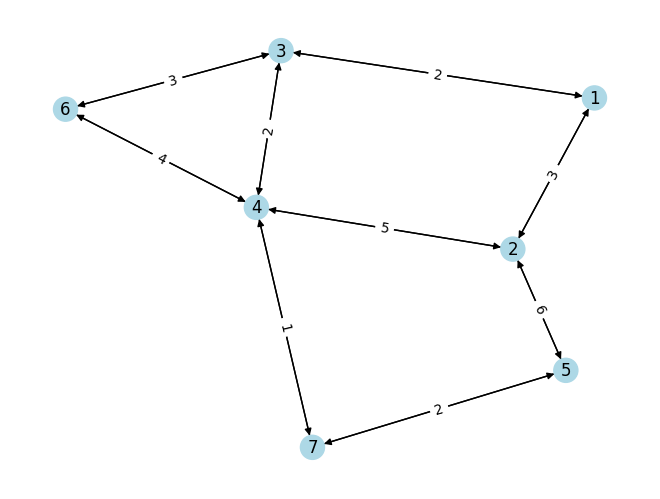

In [1]:
%run ./base.ipynb

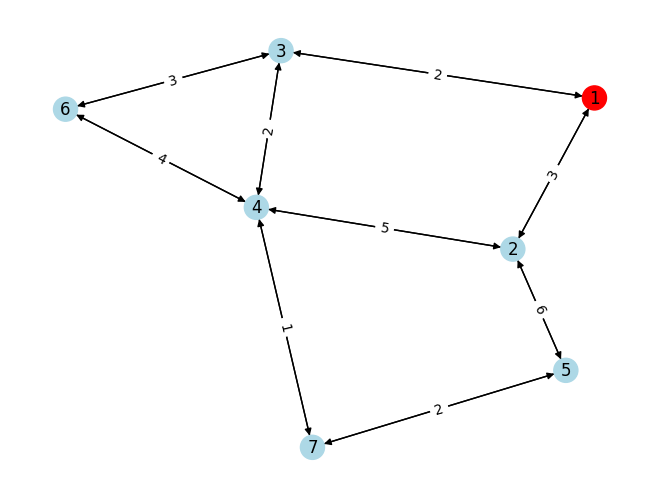

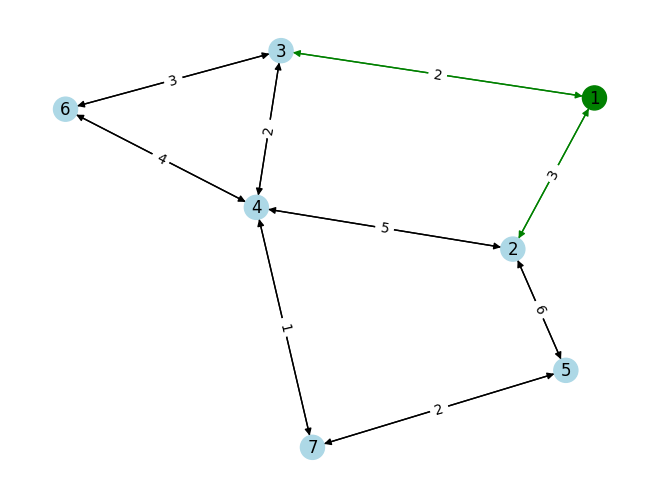

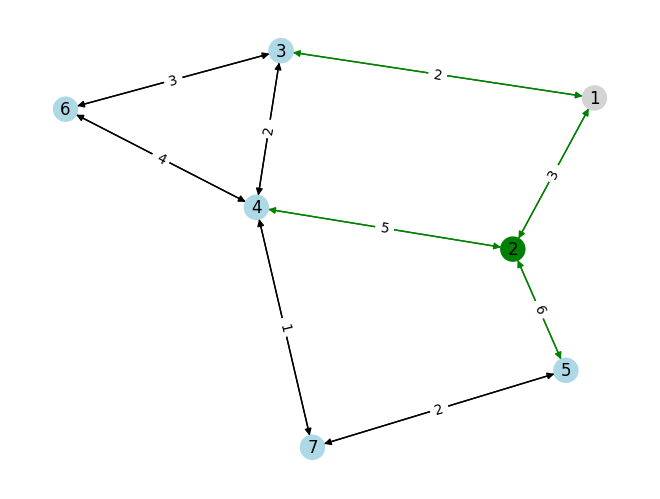

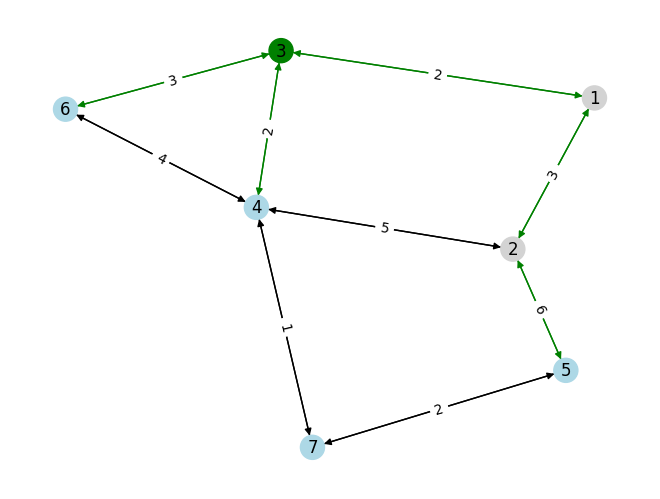

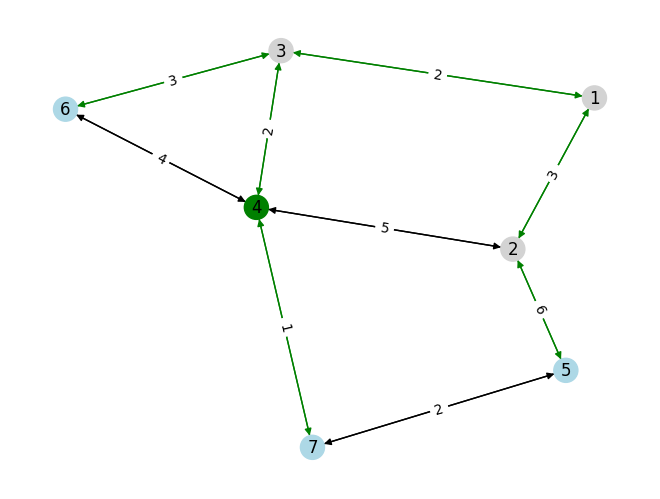

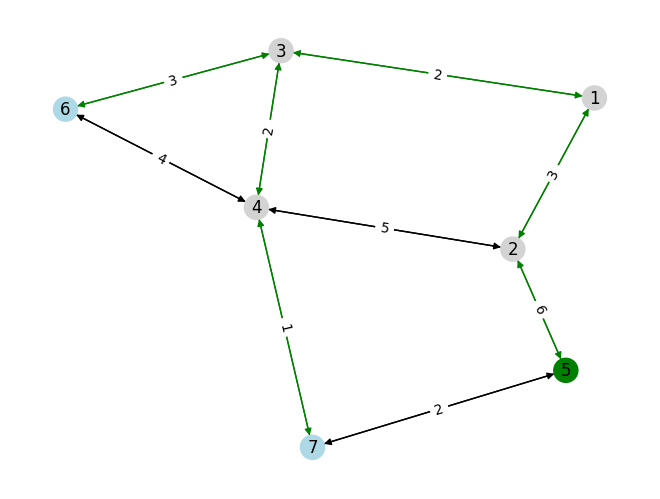

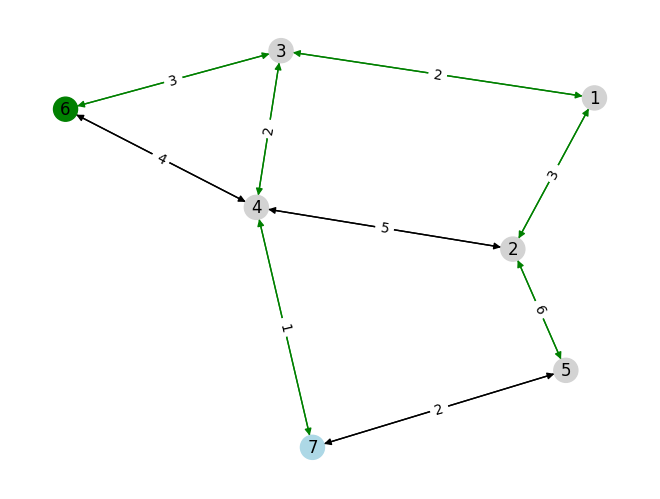

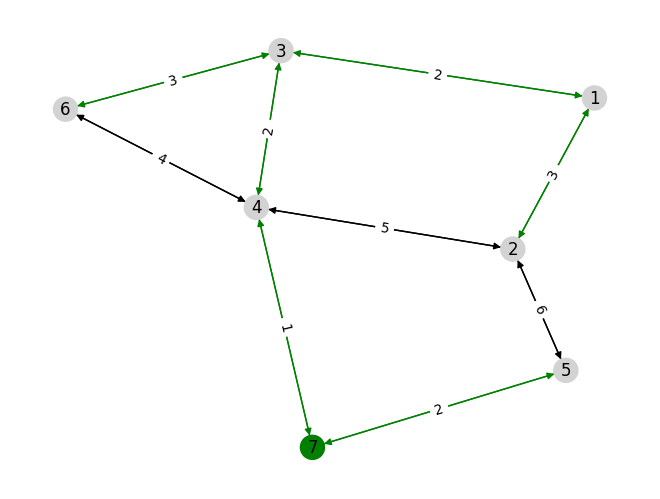

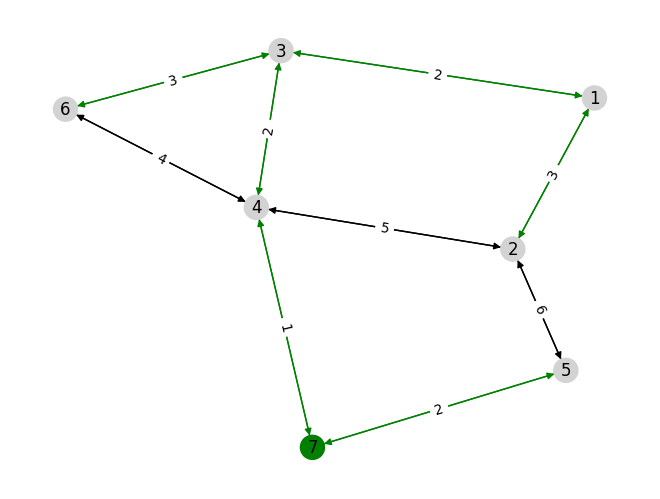

{1: 0, 2: 3, 3: 2, 4: 4, 5: 7, 6: 5, 7: 5} {1: None, 2: 1, 3: 1, 4: 3, 5: 7, 6: 3, 7: 4}


In [2]:
# Dijkstra's algorithm
def dijkstra(graph: nx.Graph, start = None, visualize_steps = False):
    Q = []

    # Leere dicts, um den Vorgänger-Knoten und die Distanz zu behalten
    dist = dict()
    prev = dict()

    # Setze die Distanz zu allen Knoten mit unendlich
    for node in list(graph.nodes()):
        dist[node] = float('inf')
        prev[node] = None
        Q.append(node)

    start = start if (start is not None) else Q[0]
    dist[start] = 0

    if visualize_steps:
        # only for visualization
        curr_node = None
        visualizer.enable_manual_mode()
        # remove up to here

    # Solang Knoten in Q
    while len(Q) > 0:
        # only for visualization
        if visualize_steps:
            visualizer.color_node(curr_node, color="lightgrey")
            # remove up to here

        # Verarbeite den nächsten Knoten aus Q
        u = Q.pop(0)

        # only for visualization
        if visualize_steps:
            curr_node = u
            visualizer.color_node(curr_node, color="green")
            # remove up to here

        edges = graph.out_edges(u, data=True)

        # Prüfe für alle Kanten von u
        for (_, v, data) in edges:
            # Ob die aktuelle Distanz von u plus das Gewicht der Kante
            alt = dist[u] + data['weight']

            curr_prev = prev[v]

            # Kleiner ist, als die aktuelle Distanz zu v
            if alt < dist[v]:
                # wenn ja, aktualisiere den Vorgänger und die Distanz zu v
                dist[v] = alt
                prev[v] = u

                # only for visualization
                if visualize_steps:
                    if curr_prev is not None:
                        visualizer.color_edge((curr_prev, v), color="default")
                    minNode = min(u, v)
                    maxNode = max(u, v)

                    visualizer.color_edge((minNode, maxNode), color="green")
                # remove up to here

        if visualize_steps:
            visualizer.draw_graph()

    if visualize_steps:
        visualizer.disable_manual_mode()

    return (dist, prev)

start = 1

visualizer.color_node(start, color="red")

dist, prev = dijkstra(G, start, visualize_steps=True)

print(dist, prev)

In [3]:
# Construct path from start to end
def get_path_to(prev, end):
    path = []
    u = end
    while u is not None:
        path.insert(0, u)
        u = prev[u]
    return path

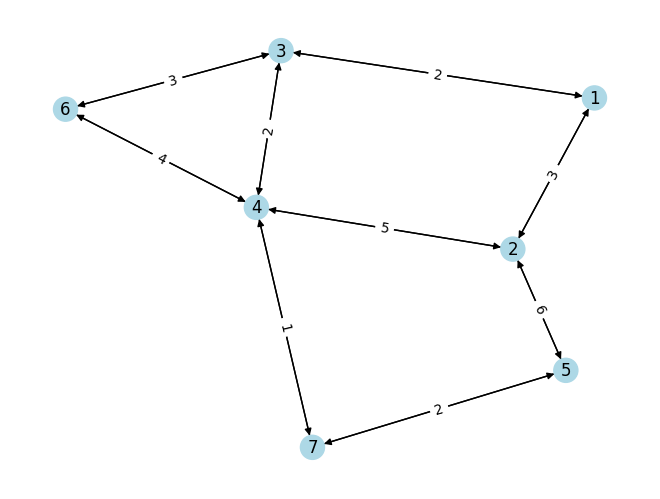

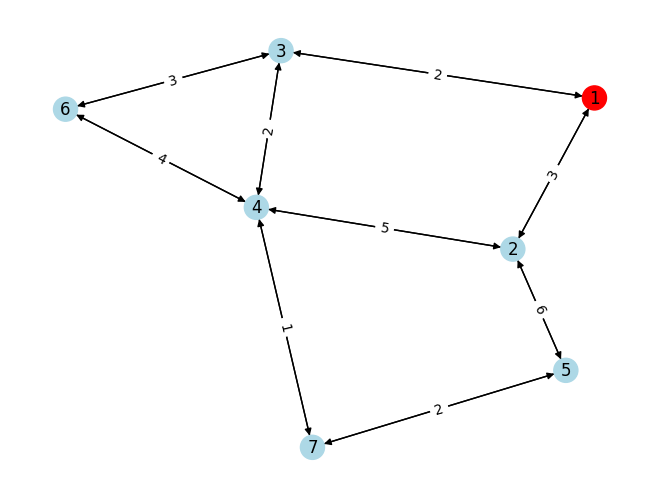

[1, 3, 4, 7]


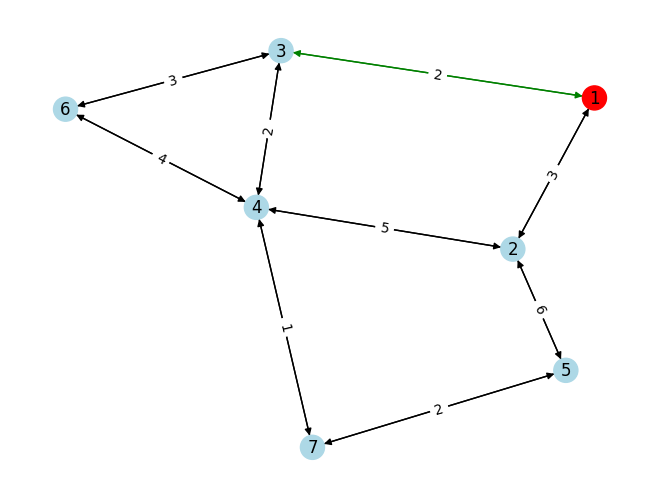

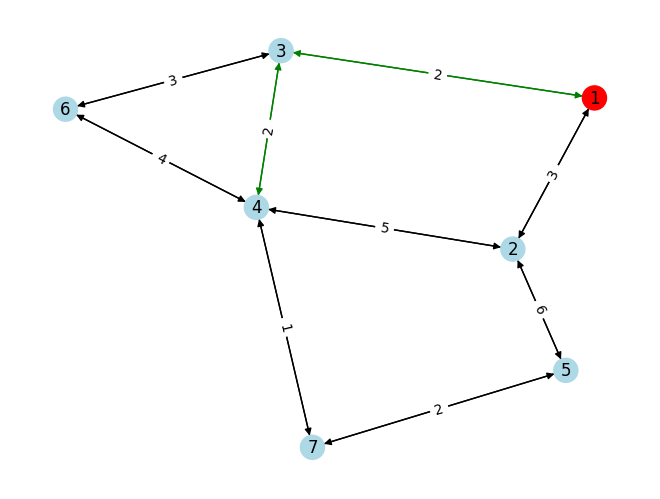

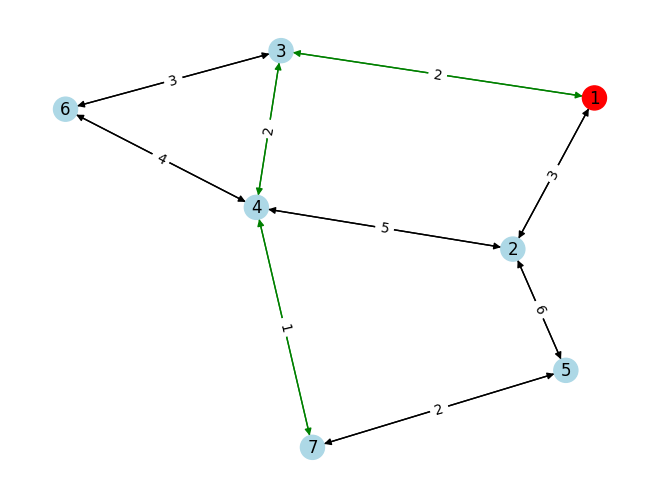

In [4]:
visualizer2 = GraphVisualizer(G, edge_label_attr="weight", seed=53)
visualizer2.draw_graph()

# Visualisierung
visualizer2.color_node(start, color="red")

# Visalisiere den kürzesten Weg von start zu Knoten 7
path = get_path_to(prev, 7)

print(path)

for i in range(len(path) - 1):
    visualizer2.color_edge((path[i], path[i + 1]), color="green")
